#ASSIGNMENT - A4(2)
# **Performing Cluster Analysis to characterize respondents based on background variables**

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 07/07/2024

**CLUSTER ANALYSIS :**

In this project, we aim to perform cluster analysis on a dataset to uncover patterns and insights that can help drive informed business decisions. Cluster analysis is a technique used to group similar data points together based on their characteristics, allowing us to identify distinct segments within the dataset. This method is particularly useful for understanding customer behavior, identifying market segments, and enhancing targeted marketing strategies.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [16]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/SCMA/A4 - PCA,MDS,FA,CA,CA/Survey.csv')

In [17]:
data.head()

,City,Sex,Age,Occupation,Monthly Household Income,Income,Planning to Buy a new house,Time Frame,Reasons for buying a house,what type of House,...,4. Availability of domestic help,Time,Size,Budgets,Maintainances,EMI.1,ages,sex,Finished/Semi Finished.1,Influence Decision.1
0,Bangalore,M,26-35,Private Sector,"85,001 to105,000",95000,Yes,6M to 1Yr,Residing,Apartment,...,1,9,1200,72.5,30000,42500,30.5,M,Semifurnished,Site visits
1,Bangalore,M,46-60,Government/PSU,"45,001 to 65,000",55000,Yes,6M to 1Yr,Investment,Apartment,...,2,9,800,32.5,120,27500,53.0,M,Semifurnished,Newspaper
2,Bangalore,F,46-60,Government/PSU,"25,001 to 45,000",35000,Yes,<6 Months,Rental Income,Apartment,...,4,3,400,12.5,10000,10000,53.0,F,Semifurnished,Hoarding
3,Bangalore,M,36-45,Private Sector,>125000,200000,Yes,<6 Months,Investment,Apartment,...,5,3,1600,102.5,70000,80000,40.5,M,Furnished,Electronic/Internet
4,Bangalore,M,26-35,Self Employed,"85,001 to105,000",95000,Yes,1-2 Yr,Residing,Apartment,...,3,18,800,52.5,30000,42500,30.5,M,Semifurnished,Electronic/Internet


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   City                                       70 non-null     object 
 1   Sex                                        70 non-null     object 
 2   Age                                        70 non-null     object 
 3   Occupation                                 70 non-null     object 
 4   Monthly Household Income                   70 non-null     object 
 5   Income                                     70 non-null     int64  
 6   Planning to Buy a new house                70 non-null     object 
 7   Time Frame                                 70 non-null     object 
 8   Reasons for buying a house                 70 non-null     object 
 9   what type of House                         70 non-null     object 
 10  Number of rooms             

In [28]:
background_var = 'Income'

In [29]:
# Extract the background variable
X = data[[background_var]]

In [30]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

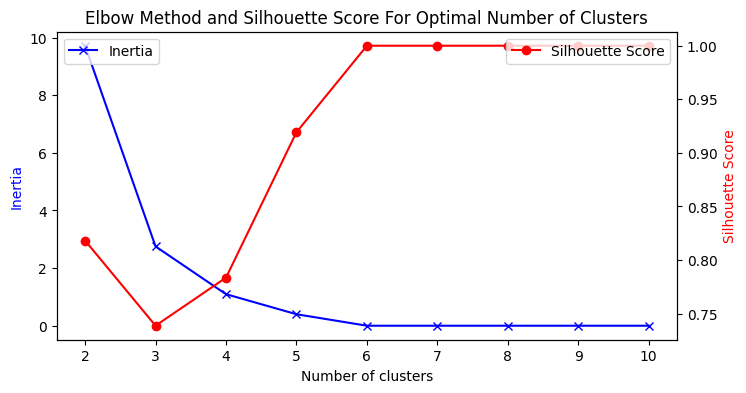

In [32]:
# Plot the elbow curve and silhouette scores
fig, ax1 = plt.subplots(figsize=(8,4))

ax2 = ax1.twinx()
ax1.plot(K, inertia, 'bx-', label='Inertia')
ax2.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='b')
ax2.set_ylabel('Silhouette Score', color='r')

plt.title('Elbow Method and Silhouette Score For Optimal Number of Clusters')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


In [33]:
# Fit the KMeans model with the optimal number of clusters

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=[background_var])
print(cluster_centers_df)

     Income
0  200000.0
1  105000.0
2   55000.0
3   75000.0
4   35000.0


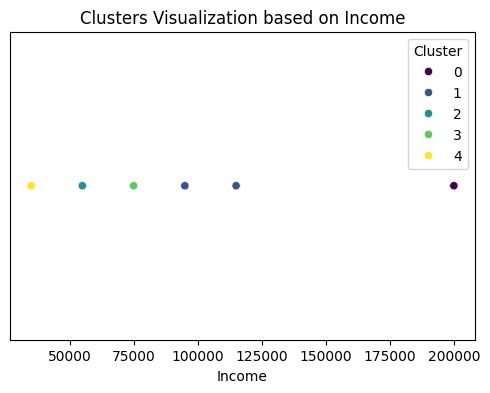

In [35]:
# Visualize the clusters
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x=background_var, y=[0]*len(data), hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters Visualization based on Income')
plt.xlabel('Income')
plt.yticks([])
plt.show()

In [36]:
# Detailed cluster profiling
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data[[background_var]].describe())
    print()

Cluster 0
         Income
count      16.0
mean   200000.0
std         0.0
min    200000.0
25%    200000.0
50%    200000.0
75%    200000.0
max    200000.0

Cluster 1
              Income
count      14.000000
mean   105000.000000
std     10377.490433
min     95000.000000
25%     95000.000000
50%    105000.000000
75%    115000.000000
max    115000.000000

Cluster 2
        Income
count     19.0
mean   55000.0
std        0.0
min    55000.0
25%    55000.0
50%    55000.0
75%    55000.0
max    55000.0

Cluster 3
        Income
count     12.0
mean   75000.0
std        0.0
min    75000.0
25%    75000.0
50%    75000.0
75%    75000.0
max    75000.0

Cluster 4
        Income
count      9.0
mean   35000.0
std        0.0
min    35000.0
25%    35000.0
50%    35000.0
75%    35000.0
max    35000.0



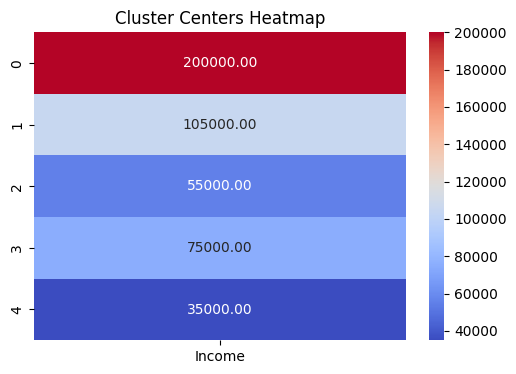

In [37]:
# Heatmap of the cluster centers
plt.figure(figsize=(6,4))
sns.heatmap(cluster_centers_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Centers Heatmap')
plt.show()

<ipython-input-38-b6f53a622cfa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')


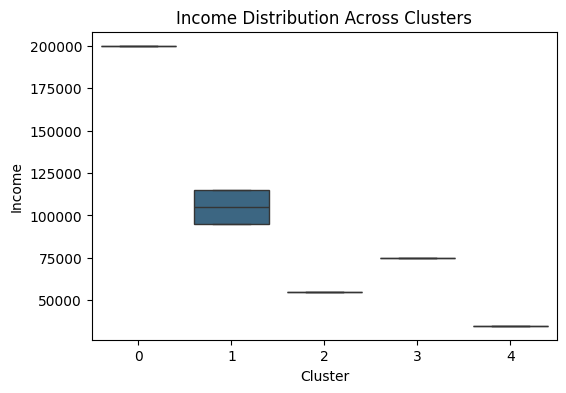

In [38]:
# Boxplot to compare the distribution of Income across clusters
plt.figure(figsize=(6, 4))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income Distribution Across Clusters')
plt.show()


<ipython-input-39-0b774610429d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Income', data=data, palette='viridis')


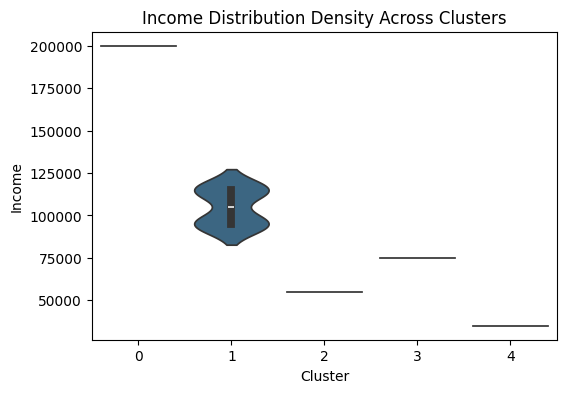

In [39]:
# Violin plot to show the distribution density of Income across clusters
plt.figure(figsize=(6,4))
sns.violinplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income Distribution Density Across Clusters')
plt.show()
